In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data] 

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_movies = pd.read_csv(path + 'ottmovies.csv')
 
df_movies.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  16+   8.7             88%   
2   3          Avengers: Infinity War  2018  13+   8.4             85%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  16+   8.8             97%   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

   Runtime   Kind  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0    148.0  movie      NaN        1     0            0        0     0  
1    136.0  movie      NaN        1     0            0        0     0  
2    149.0  movie      NaN        1     0            0        0     0  
3    116.0  movie      NaN        1     0            0        0     0  
4    161.0  movie      NaN        1     0            1        0     0

In [6]:
# profile = ProfileReport(df_movies)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
*************

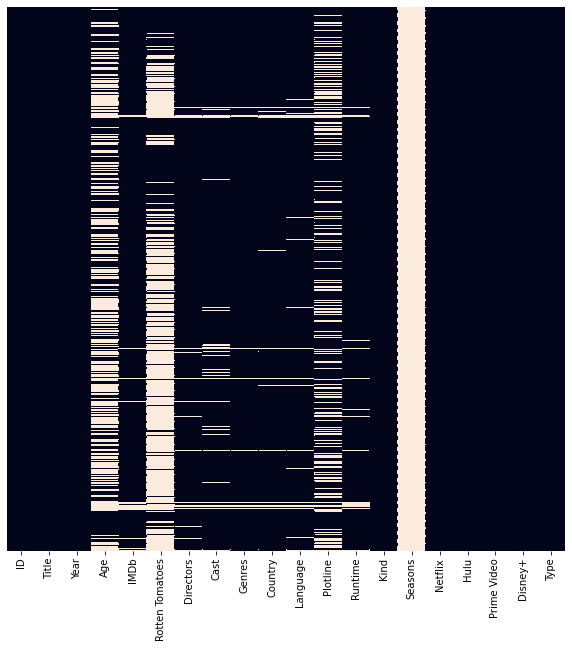

In [8]:
data_investigate(df_movies)

In [9]:
# ID
# df_movies = df_movies.drop(['ID'], axis = 1)
 
# Age
df_movies.loc[df_movies['Age'].isnull() & df_movies['Disney+'] == 1, "Age"] = '13'
# df_movies.fillna({'Age' : 18}, inplace = True)
df_movies.fillna({'Age' : 'NR'}, inplace = True)
df_movies['Age'].replace({'all': '0'}, inplace = True)
df_movies['Age'].replace({'7+': '7'}, inplace = True)
df_movies['Age'].replace({'13+': '13'}, inplace = True)
df_movies['Age'].replace({'16+': '16'}, inplace = True)
df_movies['Age'].replace({'18+': '18'}, inplace = True)
# df_movies['Age'] = df_movies['Age'].astype(int)
 
# IMDb
# df_movies.fillna({'IMDb' : df_movies['IMDb'].mean()}, inplace = True)
# df_movies.fillna({'IMDb' : df_movies['IMDb'].median()}, inplace = True)
df_movies.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].astype(int)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].mean()}, inplace = True)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].median()}, inplace = True)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].astype(int)
df_movies.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_movies = df_movies.drop(['Directors'], axis = 1)
df_movies.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_movies.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_movies.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_movies.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_movies.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_movies.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_movies.fillna({'Runtime' : df_movies['Runtime'].mean()}, inplace = True)
# df_movies['Runtime'] = df_movies['Runtime'].astype(int)
df_movies.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_movies.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_movies.fillna({'Type': "NA"}, inplace = True)
# df_movies = df_movies.drop(['Type'], axis = 1)
 
# Seasons
# df_movies.fillna({'Seasons': 1}, inplace = True)
# df_movies.fillna({'Seasons': "NA"}, inplace = True)
df_movies = df_movies.drop(['Seasons'], axis = 1)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
# df_movies.fillna({'Seasons' : df_movies['Seasons'].mean()}, inplace = True)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
 
# Service Provider
df_movies['Service Provider'] = df_movies.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_movies.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_movies.dropna(how = 'any', inplace = True)
df_movies.drop_duplicates(inplace = True)

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Service Provider    object
dtype: obje

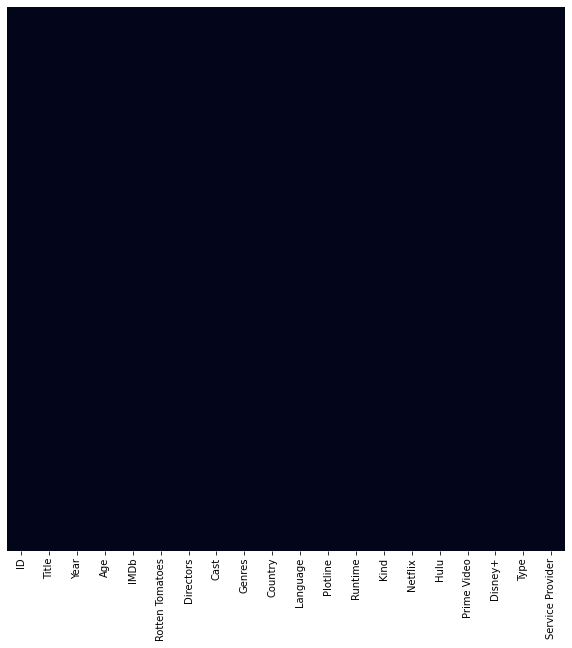

In [10]:
data_investigate(df_movies)

In [11]:
df_movies.head()

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13  8.8              87   
1   2                      The Matrix  1999  16  8.7              88   
2   3          Avengers: Infinity War  2018  13  8.4              85   
3   4              Back to the Future  1985   7  8.5              96   
4   5  The Good, the Bad and the Ugly  1966  16  8.8              97   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0     148  movie        1     0            0        0     0          Netflix  
1     136  movie        1     0            0        0     0          Netflix  
2     149  movie        1     0            0        0     0          Netflix  
3     116  movie        1     0            0        0     0          Netflix  
4     161  movie        1     0            1        0     0          Netflix

In [12]:
df_movies.describe()

ID          Year       Netflix          Hulu   Prime Video  \
count  16923.000000  16923.000000  16923.000000  16923.000000  16923.000000   
mean    8462.000000   2003.211901      0.214915      0.062637      0.727235   
std     4885.393638     20.526532      0.410775      0.242315      0.445394   
min        1.000000   1901.000000      0.000000      0.000000      0.000000   
25%     4231.500000   2001.000000      0.000000      0.000000      0.000000   
50%     8462.000000   2012.000000      0.000000      0.000000      1.000000   
75%    12692.500000   2016.000000      0.000000      0.000000      1.000000   
max    16923.000000   2020.000000      1.000000      1.000000      1.000000   

            Disney+     Type  
count  16923.000000  16923.0  
mean       0.033150      0.0  
std        0.179034      0.0  
min        0.000000      0.0  
25%        0.000000      0.0  
50%        0.000000      0.0  
75%        0.000000      0.0  
max        1.000000      0.0

In [13]:
df_movies.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.217816 -0.644470 -0.129926     0.469301  0.263530   
Year        -0.217816  1.000000  0.256151  0.101337    -0.255578 -0.047258   
Netflix     -0.644470  0.256151  1.000000 -0.118032    -0.745141 -0.089649   
Hulu        -0.129926  0.101337 -0.118032  1.000000    -0.284654 -0.039693   
Prime Video  0.469301 -0.255578 -0.745141 -0.284654     1.000000 -0.289008   
Disney+      0.263530 -0.047258 -0.089649 -0.039693    -0.289008  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_movies.sort_values('Year', ascending = True)
# df_movies.sort_values('IMDb', ascending = False)

In [15]:
# df_movies.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_ottmovies.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_movies = pd.read_csv(path + 'updated_ottmovies.csv')
 
# udf_movies

In [16]:
# df_netflix_movies = df_movies.loc[(df_movies['Netflix'] > 0)]
# df_hulu_movies = df_movies.loc[(df_movies['Hulu'] > 0)]
# df_prime_video_movies = df_movies.loc[(df_movies['Prime Video'] > 0)]
# df_disney_movies = df_movies.loc[(df_movies['Disney+'] > 0)]

In [17]:
df_netflix_only_movies = df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_hulu_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_prime_video_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 1 ) & (df_movies['Disney+'] == 0)]
df_disney_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 1)]

In [18]:
df_movies_genres = df_movies.copy()

In [19]:
df_movies_genres.drop(df_movies_genres.loc[df_movies_genres['Genres'] == "NA"].index, inplace = True)
# df_movies_genres = df_movies_genres[df_movies_genres.Genre != "NA"]
# df_movies_genres['Genres'] = df_movies_genres['Genres'].astype(str)

In [20]:
df_movies_count_genres = df_movies_genres.copy()

In [21]:
df_movies_genre = df_movies_genres.copy()

In [22]:
# Create genres dict where key=name and value = number of genres
 
genres = {}
 
for i in df_movies_count_genres['Genres'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        genres[i] = len(i.split(','))
    else:
        genres[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_count_genres['Number of Genres'] = df_movies_count_genres['Genres'].map(genres).astype(int)

In [23]:
df_movies_mixed_genres = df_movies_count_genres.copy()

In [24]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_genres_movies = df_movies_count_genres.loc[df_movies_count_genres['Netflix'] == 1]
hulu_genres_movies = df_movies_count_genres.loc[df_movies_count_genres['Hulu'] == 1]
prime_video_genres_movies = df_movies_count_genres.loc[df_movies_count_genres['Prime Video'] == 1]
disney_genres_movies = df_movies_count_genres.loc[df_movies_count_genres['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

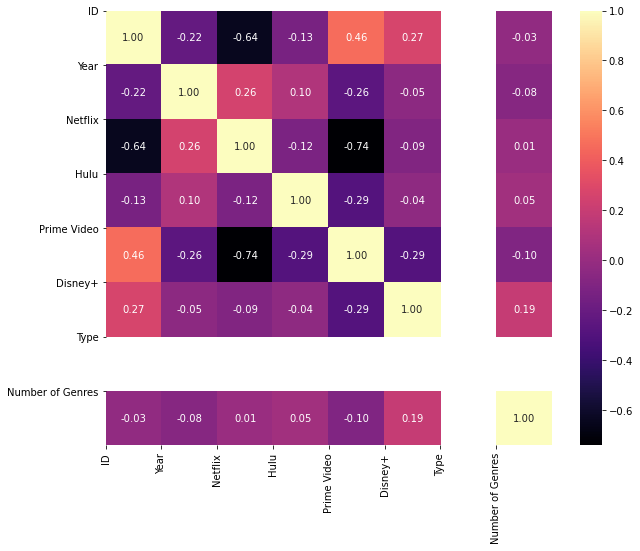

In [25]:
plt.figure(figsize = (10, 10))
corr = df_movies_count_genres.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_genres_most_movies = df_movies_count_genres.sort_values(by = 'Number of Genres', ascending = False).reset_index()
df_genres_most_movies = df_genres_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_count_genres['Number of Genres'] == (df_movies_count_genres['Number of Genres'].max()))
# df_genres_most_movies = df_movies_count_genres[filter]
 
# mostest_rated_movies = df_movies_count_genres.loc[df_movies_count_genres['Number of Genres'].idxmax()]
 
print('\nMovies with Highest Ever Number of Genres are : \n')
df_genres_most_movies.head(5)


Movies with Highest Ever Number of Genres are : 



ID                             Title  Year Age IMDb Rotten Tomatoes  \
0  12791     Gappa, the Triphibian Monster  1967   7  4.3              NA   
1   8618      Inspector Gadget's Last Case  2002   7  4.9              NA   
2   7750                    RWBY: Volume 1  2013   7  7.9              NA   
3  13360  Nazis at the Center of the Earth  2012  16  3.1              NA   
4   6260                          Motorama  1991  16  6.4              60   

                   Directors  \
0            Hiroshi Noguchi   
1            Michael Maliani   
2  Monty Oum,Kerry Shawcross   
3           Joseph J. Lawson   
4                Barry Shils   

                                                Cast  \
0  Tamio Kawaji,Yôko Yamamoto,Yûji Odaka,Kôji Wad...   
1  Maurice LaMarche,Bettina Bush,Jim Byrnes,Micha...   
2  Jen Taylor,Shannon McCormick,Gray G. Haddock,W...   
3  Dominique Swain,Jake Busey,Joshua Michael Alle...   
4  Jordan Christopher Michael,Martha Quinn,Michae...   

                                              Genres               Country  \
0  Action,Adventure,Comedy,Drama,Family,Fantasy,H...                 Japan   
1  Animation,Action,Adventure,Comedy,Crime,Family...  Canada,United States   
2  Animation,Action,Adventure,Comedy,Crime,Drama,...         United States   
3  Action,Adventure,Comedy,Horror,Mystery,Sci-Fi,...         United States   
4  Adventure,Comedy,Crime,Drama,Fantasy,Mystery,S...         United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  A frontier preacher's life is destroyed when a...      90  movie   
1  ...  The tough gun-man Burt Sullivan (Franco Nero) ...      73  movie   
2  ...  A married police captain arrives at a lake to ...     112  movie   
3  ...  Based On True Events. Silent No More is a cry ...      89  movie   
4  ...  An American nurse takes a temporary position o...      90  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       0     0            1        0     0       Prime Video                9  
1       0     0            1        0     0       Prime Video                8  
2       0     0            1        0     0       Prime Video                8  
3       0     0            1        0     0       Prime Video                8  
4       0     0            1        0     0       Prime Video                8  

[5 rows x 21 columns]

In [27]:
fig = px.bar(y = df_genres_most_movies['Title'][:15],
             x = df_genres_most_movies['Number of Genres'][:15], 
             color = df_genres_most_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Highest Number of Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_genres_least_movies = df_movies_count_genres.sort_values(by = 'Number of Genres', ascending = True).reset_index()
df_genres_least_movies = df_genres_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_count_genres['Number of Genres'] == (df_movies_count_genres['Number of Genres'].min()))
# df_genres_least_movies = df_movies_count_genres[filter]

print('\nMovies with Lowest Ever Number of Genres are : \n')
df_genres_least_movies.head(5)


Movies with Lowest Ever Number of Genres are : 



ID              Title  Year Age IMDb Rotten Tomatoes        Directors  \
0  8426  Mark Of The Witch  2014  NR  4.6              38        Tom Moore   
1  8947       The Longshot  1986  13  5.5              41      Paul Bartel   
2  8938           Stranded  2001  16    6               0      Deon Taylor   
3  8935   Brace for Impact  2016  NR  4.8              NA  Michel Poulette   
4  8932        Black Creek  2018  NR  4.4              NA       James Crow   

                                                Cast    Genres        Country  \
0  Robert Elston,Anitra Walsh,Darryl Wells,Jack G...    Horror  United States   
1  Brad Trumbull,Tim Conway,Jack Weston,Harvey Ko...    Comedy  United States   
2  Priscilla Quintana,Luke Goss,Paula Patton,Will...  Thriller  United States   
3  Kerry Condon,Sheila McCarthy,Ennis Esmer,Rafae...  Thriller         Canada   
4  Chris O'Flyng,Leah Patrick,Michael Copon,Micha...    Horror  United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  Jobless and hopeless, Rodney (Steve Olson) hit...      77  movie   
1  ...                                                 NA      89  movie   
2  ...  Jan. 1 1994: The Day the North American Free T...      96  movie   
3  ...  Successful doctor Artur Planck, his wife Clara...      88  movie   
4  ...  What comes to mind when you think of British c...      80  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       0     0            1        0     0       Prime Video                1  
1       0     0            1        0     0       Prime Video                1  
2       0     0            1        0     0       Prime Video                1  
3       0     0            1        0     0       Prime Video                1  
4       0     0            1        0     0       Prime Video                1  

[5 rows x 21 columns]

In [29]:
fig = px.bar(y = df_genres_least_movies['Title'][:15],
             x = df_genres_least_movies['Number of Genres'][:15], 
             color = df_genres_least_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Lowest Number of Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_movies_count_genres['Number of Genres'].unique().shape[0]}' unique Number of Genres s were Given, They were Like this,\n
      
      {df_movies_count_genres.sort_values(by = 'Number of Genres', ascending = False)['Number of Genres'].unique()}\n
 
      The Highest Number of Genres Ever Any Movie Got is '{df_genres_most_movies['Title'][0]}' : '{df_genres_most_movies['Number of Genres'].max()}'\n
 
      The Lowest Number of Genres Ever Any Movie Got is '{df_genres_least_movies['Title'][0]}' : '{df_genres_least_movies['Number of Genres'].min()}'\n
      ''')


      Total '9' unique Number of Genres s were Given, They were Like this,

      
      [9 8 7 6 5 4 3 2 1]

 
      The Highest Number of Genres Ever Any Movie Got is 'Gappa, the Triphibian Monster' : '9'

 
      The Lowest Number of Genres Ever Any Movie Got is 'Mark Of The Witch' : '1'

      


In [31]:
netflix_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Netflix']==1].reset_index()
netflix_genres_most_movies = netflix_genres_most_movies.drop(['index'], axis = 1)
 
netflix_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Netflix']==1].reset_index()
netflix_genres_least_movies = netflix_genres_least_movies.drop(['index'], axis = 1)
 
netflix_genres_most_movies.head(5)

ID                                              Title  Year Age IMDb  \
0  1054                                  WHAT DID JACK DO?  2017  16  6.5   
1  2047  Alpha and Omega: The Legend of the Saw Tooth Cave  2014   7  5.4   
2   288                  April and the Extraordinary World  2015   7  7.3   
3  1012                                            Gantz:O  2016  18  7.1   
4   423                                       Om Shanti Om  2007   7  6.7   

  Rotten Tomatoes                         Directors  \
0              92                       David Lynch   
1              NA                      Richard Rich   
2              97  Christian Desmares,Franck Ekinci   
3              NA    Yasushi Kawamura,Kei'ichi Sato   
4              76                        Farah Khan   

                                                Cast  \
0      Jack Cruz,David Lynch,Toototabon,Emily Stofle   
1  Kate Higgins,Ben Diskin,Debi Derryberry,Mariev...   
2  Marion Cotillard,Marc-André Grondin,Philippe K...   
3  Daisuke Ono,Mao Ichimichi,Tomohiro Kaku,Saori ...   
4  Shah Rukh Khan,Arjun Rampal,Kirron Kher,Shreya...   

                                              Genres                Country  \
0  Short,Comedy,Crime,Drama,Fantasy,Music,Mystery...          United States   
1  Animation,Action,Adventure,Comedy,Drama,Family...    United States,India   
2  Animation,Adventure,Comedy,Drama,Family,Myster...  France,Canada,Belgium   
3  Animation,Action,Drama,Fantasy,Horror,Sci-Fi,T...                  Japan   
4  Action,Comedy,Drama,Fantasy,Musical,Romance,Th...                  India   

   ...                                           Plotline Runtime   Kind  \
0  ...  Dressed up in a formal suit, evoking memories ...      17  movie   
1  ...                                                 NA      45  movie   
2  ...  In 1941, the world is radically different from...     105  movie   
3  ...                                                 NA      95  movie   
4  ...  Om Prakash Makhija is a Junior Artist in the 1...     162  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       1     0            0        0     0           Netflix                8  
1       1     0            0        0     0           Netflix                8  
2       1     0            0        0     0           Netflix                8  
3       1     0            0        0     0           Netflix                7  
4       1     0            0        0     0           Netflix                7  

[5 rows x 21 columns]

In [32]:
fig = px.bar(y = netflix_genres_most_movies['Title'][:15],
             x = netflix_genres_most_movies['Number of Genres'][:15], 
             color = netflix_genres_most_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Highest Number of Genres : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_genres_least_movies['Title'][:15],
             x = netflix_genres_least_movies['Number of Genres'][:15], 
             color = netflix_genres_least_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Lowest Number of Genres : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Hulu']==1].reset_index()
hulu_genres_most_movies = hulu_genres_most_movies.drop(['index'], axis = 1)
 
hulu_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Hulu']==1].reset_index()
hulu_genres_least_movies = hulu_genres_least_movies.drop(['index'], axis = 1)
 
hulu_genres_most_movies.head(5)

ID             Title  Year Age IMDb Rotten Tomatoes  \
0  3828  The Osiris Child  2016  NR  5.6              62   
1  3875         The Lorax  1972   7  6.4              54   
2  3549            Thelma  2017  NR    7              85   
3  4032      Wakko's Wish  1999   0  7.3              NA   
4  3947   Sherlock Gnomes  2018   7  5.2              27   

                                           Directors  \
0                                       Shane Abbess   
1                            Chris Renaud,Kyle Balda   
2                                      Joachim Trier   
3  Liz Holzman,Rusty Mills,Tom Ruegger,Russell Ca...   
4                                     John Stevenson   

                                                Cast  \
0  Kellan Lutz,Daniel MacPherson,Isabel Lucas,Luk...   
1  Danny DeVito,Ed Helms,Zac Efron,Taylor Swift,B...   
2  Eili Harboe,Kaya Wilkins,Henrik Rafaelsen,Elle...   
3  Rob Paulsen,Jess Harnell,Tress MacNeille,Mauri...   
4  Kelly Asbury,Mary J. Blige,Emily Blunt,Julio B...   

                                              Genres  \
0  Action,Adventure,Drama,Fantasy,Horror,Sci-Fi,T...   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Th...   
3  Animation,Adventure,Comedy,Drama,Family,Fantas...   
4  Animation,Adventure,Comedy,Family,Fantasy,Myst...   

                                             Country  ...  \
0                                          Australia  ...   
1                         United States,France,Japan  ...   
2                       Norway,France,Denmark,Sweden  ...   
3                                      United States  ...   
4  United Kingdom,United States,India,Canada,Fran...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Set in a time of interplanetary colonization, ...      99  movie       0   
1  In the walled city of Thneed-Ville, where ever...      86  movie       0   
2  Having just enrolled at a university in Oslo a...     116  movie       0   
3  The Warner Brothers (and the Warner Sister) go...      80  movie       0   
4  Sherlock Gnomes (Johnny Depp) and his assistan...      86  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0     1            0        0     0              Hulu                7  
1     1            0        0     0              Hulu                7  
2     1            0        0     0              Hulu                7  
3     1            0        0     0              Hulu                7  
4     1            1        0     0       Prime Video                7  

[5 rows x 21 columns]

In [35]:
fig = px.bar(y = hulu_genres_most_movies['Title'][:15],
             x = hulu_genres_most_movies['Number of Genres'][:15], 
             color = hulu_genres_most_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Highest Number of Genres : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_genres_least_movies['Title'][:15],
             x = hulu_genres_least_movies['Number of Genres'][:15], 
             color = hulu_genres_least_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Lowest Number of Genres : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Prime Video']==1].reset_index()
prime_video_genres_most_movies = prime_video_genres_most_movies.drop(['index'], axis = 1)
 
prime_video_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Prime Video']==1].reset_index()
prime_video_genres_least_movies = prime_video_genres_least_movies.drop(['index'], axis = 1)
 
prime_video_genres_most_movies.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0  12791     Gappa, the Triphibian Monster  1967   7  4.3              NA   
1   8618      Inspector Gadget's Last Case  2002   7  4.9              NA   
2   7750                    RWBY: Volume 1  2013   7  7.9              NA   
3  13360  Nazis at the Center of the Earth  2012  16  3.1              NA   
4   6260                          Motorama  1991  16  6.4              60   

                   Directors  \
0            Hiroshi Noguchi   
1            Michael Maliani   
2  Monty Oum,Kerry Shawcross   
3           Joseph J. Lawson   
4                Barry Shils   

                                                Cast  \
0  Tamio Kawaji,Yôko Yamamoto,Yûji Odaka,Kôji Wad...   
1  Maurice LaMarche,Bettina Bush,Jim Byrnes,Micha...   
2  Jen Taylor,Shannon McCormick,Gray G. Haddock,W...   
3  Dominique Swain,Jake Busey,Joshua Michael Alle...   
4  Jordan Christopher Michael,Martha Quinn,Michae...   

                                              Genres               Country  \
0  Action,Adventure,Comedy,Drama,Family,Fantasy,H...                 Japan   
1  Animation,Action,Adventure,Comedy,Crime,Family...  Canada,United States   
2  Animation,Action,Adventure,Comedy,Crime,Drama,...         United States   
3  Action,Adventure,Comedy,Horror,Mystery,Sci-Fi,...         United States   
4  Adventure,Comedy,Crime,Drama,Fantasy,Mystery,S...         United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  A frontier preacher's life is destroyed when a...      90  movie   
1  ...  The tough gun-man Burt Sullivan (Franco Nero) ...      73  movie   
2  ...  A married police captain arrives at a lake to ...     112  movie   
3  ...  Based On True Events. Silent No More is a cry ...      89  movie   
4  ...  An American nurse takes a temporary position o...      90  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       0     0            1        0     0       Prime Video                9  
1       0     0            1        0     0       Prime Video                8  
2       0     0            1        0     0       Prime Video                8  
3       0     0            1        0     0       Prime Video                8  
4       0     0            1        0     0       Prime Video                8  

[5 rows x 21 columns]

In [38]:
fig = px.bar(y = prime_video_genres_most_movies['Title'][:15],
             x = prime_video_genres_most_movies['Number of Genres'][:15], 
             color = prime_video_genres_most_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Highest Number of Genres : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_genres_least_movies['Title'][:15],
             x = prime_video_genres_least_movies['Number of Genres'][:15], 
             color = prime_video_genres_least_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Lowest Number of Genres : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Disney+']==1].reset_index()
disney_genres_most_movies = disney_genres_most_movies.drop(['index'], axis = 1)
 
disney_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Disney+']==1].reset_index()
disney_genres_least_movies = disney_genres_least_movies.drop(['index'], axis = 1)
 
disney_genres_most_movies.head(5)

ID                              Title  Year Age IMDb Rotten Tomatoes  \
0  15997  The Wizards Return: Alex vs. Alex  2013   7  6.5              NA   
1  16106            Atlantis: Milo's Return  2003   0  5.1              NA   
2  15932    Aladdin and the King of Thieves  1996   0  6.4              33   
3  16151                   Doug's 1st Movie  1999   0    5              26   
4  16913                           Hercules  1998   7  7.3              NA   

                             Directors  \
0                      Victor Gonzalez   
1  Victor Cook,Toby Shelton,Tad Stones   
2                           Tad Stones   
3                        Maurice Joyce   
4             Ron Clements,John Musker   

                                                Cast  \
0  Selena Gomez,Jake T. Austin,Jennifer Stone,Gre...   
1  James Arnold Taylor,Cree Summer,John Mahoney,J...   
2  Val Bettin,Jim Cummings,Gilbert Gottfried,Lind...   
3  Thomas McHugh,Fred Newman,Chris Phillips,Const...   
4  Tate Donovan,Josh Keaton,Roger Bart,Danny DeVi...   

                                              Genres               Country  \
0  Animation,Action,Adventure,Comedy,Drama,Family...         United States   
1  Animation,Action,Adventure,Comedy,Drama,Family...         United States   
2  Animation,Adventure,Comedy,Family,Fantasy,Musi...         United States   
3  Animation,Adventure,Comedy,Drama,Family,Fantas...         United States   
4  Animation,Adventure,Comedy,Family,Fantasy,Musi...  United States,France   

   ...                                           Plotline Runtime   Kind  \
0  ...  Dylan Shoenfield is the pink princess of the u...      60  movie   
1  ...                                                 NA      70  movie   
2  ...  Huckelberry was a young boy , who runs away fr...      81  movie   
3  ...  Diving With Dolphins chronicles the making of ...      77  movie   
4  ...                                                 NA      93  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       0     0            0        1     0           Disney+                8  
1       0     0            0        1     0           Disney+                8  
2       0     0            0        1     0           Disney+                7  
3       0     0            0        1     0           Disney+                7  
4       0     0            0        1     0           Disney+                7  

[5 rows x 21 columns]

In [41]:
fig = px.bar(y = disney_genres_most_movies['Title'][:15],
             x = disney_genres_most_movies['Number of Genres'][:15], 
             color = disney_genres_most_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Highest Number of Genres : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_genres_least_movies['Title'][:15],
             x = disney_genres_least_movies['Number of Genres'][:15], 
             color = disney_genres_least_movies['Number of Genres'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Genres'},
             title  = 'Movies with Lowest Number of Genres : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The Movie with Highest Number of Genres Ever Got is '{df_genres_most_movies['Title'][0]}' : '{df_genres_most_movies['Number of Genres'].max()}'\n
      The Movie with Lowest Number of Genres Ever Got is '{df_genres_least_movies['Title'][0]}' : '{df_genres_least_movies['Number of Genres'].min()}'\n
      
      The Movie with Highest Number of Genres on 'Netflix' is '{netflix_genres_most_movies['Title'][0]}' : '{netflix_genres_most_movies['Number of Genres'].max()}'\n
      The Movie with Lowest Number of Genres on 'Netflix' is '{netflix_genres_least_movies['Title'][0]}' : '{netflix_genres_least_movies['Number of Genres'].min()}'\n
      
      The Movie with Highest Number of Genres on 'Hulu' is '{hulu_genres_most_movies['Title'][0]}' : '{hulu_genres_most_movies['Number of Genres'].max()}'\n
      The Movie with Lowest Number of Genres on 'Hulu' is '{hulu_genres_least_movies['Title'][0]}' : '{hulu_genres_least_movies['Number of Genres'].min()}'\n
      
      The Movie with Highest Number of Genres on 'Prime Video' is '{prime_video_genres_most_movies['Title'][0]}' : '{prime_video_genres_most_movies['Number of Genres'].max()}'\n
      The Movie with Lowest Number of Genres on 'Prime Video' is '{prime_video_genres_least_movies['Title'][0]}' : '{prime_video_genres_least_movies['Number of Genres'].min()}'\n
      
      The Movie with Highest Number of Genres on 'Disney+' is '{disney_genres_most_movies['Title'][0]}' : '{disney_genres_most_movies['Number of Genres'].max()}'\n
      The Movie with Lowest Number of Genres on 'Disney+' is '{disney_genres_least_movies['Title'][0]}' : '{disney_genres_least_movies['Number of Genres'].min()}'\n 
      ''')


      The Movie with Highest Number of Genres Ever Got is 'Gappa, the Triphibian Monster' : '9'

      The Movie with Lowest Number of Genres Ever Got is 'Mark Of The Witch' : '1'

      
      The Movie with Highest Number of Genres on 'Netflix' is 'WHAT DID JACK DO?' : '8'

      The Movie with Lowest Number of Genres on 'Netflix' is 'Bangkok รัก Stories 2 ตอน ไม่เดียงสา' : '1'

      
      The Movie with Highest Number of Genres on 'Hulu' is 'The Osiris Child' : '7'

      The Movie with Lowest Number of Genres on 'Hulu' is 'In the Radiant City' : '1'

      
      The Movie with Highest Number of Genres on 'Prime Video' is 'Gappa, the Triphibian Monster' : '9'

      The Movie with Lowest Number of Genres on 'Prime Video' is 'Mark Of The Witch' : '1'

      
      The Movie with Highest Number of Genres on 'Disney+' is 'The Wizards Return: Alex vs. Alex' : '8'

      The Movie with Lowest Number of Genres on 'Disney+' is 'Man Among Cheetahs' : '1'
 
      


In [44]:
print(f'''
      Accross All Platforms the Average Number of Genres is '{round(df_movies_count_genres['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Netflix' is '{round(netflix_genres_movies['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Hulu' is '{round(hulu_genres_movies['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Prime Video' is '{round(prime_video_genres_movies['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Number of Genres on 'Disney+' is '{round(disney_genres_movies['Number of Genres'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Genres is '2.41'

      The Average Number of Genres on 'Netflix' is '2.43'

      The Average Number of Genres on 'Hulu' is '2.64'

      The Average Number of Genres on 'Prime Video' is '2.33'

      The Average Number of Genres on 'Disney+' is '3.73'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Genre is '{df_movies_count_genres['Number of Genres'].max()}'\n
      Total Count of Genre on 'Netflix' is '{netflix_genres_movies['Number of Genres'].max()}'\n
      Total Count of Genre on 'Hulu' is '{hulu_genres_movies['Number of Genres'].max()}'\n
      Total Count of Genre on 'Prime Video' is '{prime_video_genres_movies['Number of Genres'].max()}'\n
      Total Count of Genre on 'Disney+' is '{disney_genres_movies['Number of Genres'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Genre is '9'

      Total Count of Genre on 'Netflix' is '8'

      Total Count of Genre on 'Hulu' is '7'

      Total Count of Genre on 'Prime Video' is '9'

      Total Count of Genre on 'Disney+' is '8'
 
      


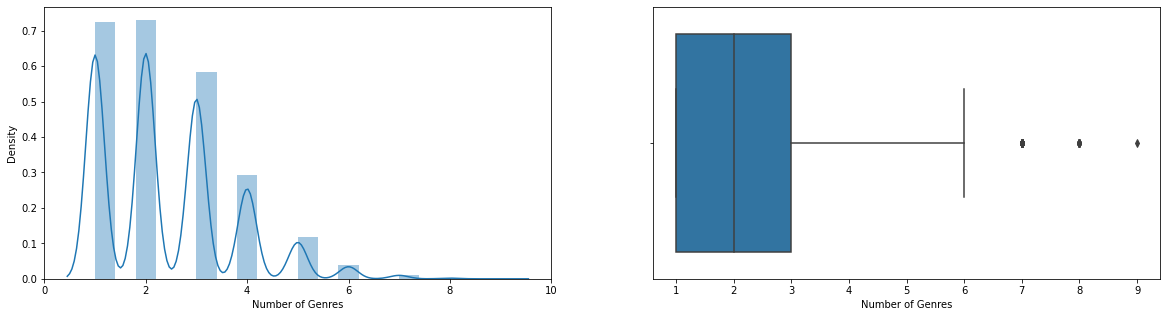

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_count_genres['Number of Genres'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_count_genres['Number of Genres'], ax = ax[1])
plt.show()

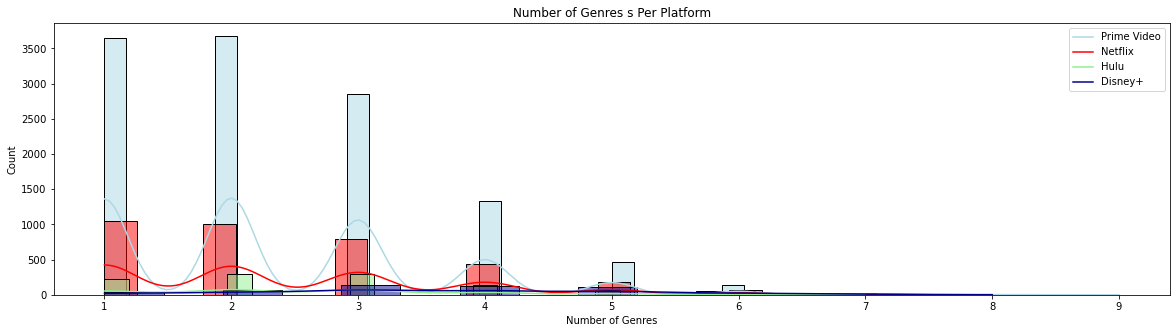

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Genres s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_genres_movies['Number of Genres'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_genres_movies['Number of Genres'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_genres_movies['Number of Genres'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_genres_movies['Number of Genres'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_movies_genre['Genres'].str.split(',').apply(pd.Series).stack()
del df_movies_genre['Genres']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Genre'
df_movies_genre = df_movies_genre.join(df_lan)
df_movies_genre.drop_duplicates(inplace = True)

In [49]:
df_movies_genre.head(5)

ID       Title  Year Age IMDb Rotten Tomatoes  \
0   1   Inception  2010  13  8.8              87   
0   1   Inception  2010  13  8.8              87   
0   1   Inception  2010  13  8.8              87   
0   1   Inception  2010  13  8.8              87   
1   2  The Matrix  1999  16  8.7              88   

                        Directors  \
0               Christopher Nolan   
0               Christopher Nolan   
0               Christopher Nolan   
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   

                        Country                 Language  \
0  United States,United Kingdom  English,Japanese,French   
0  United States,United Kingdom  English,Japanese,French   
0  United States,United Kingdom  English,Japanese,French   
0  United States,United Kingdom  English,Japanese,French   
1                 United States                  English   

                                            Plotline Runtime   Kind  Netflix  \
0  Dom Cobb is a skilled thief, the absolute best...     148  movie        1   
0  Dom Cobb is a skilled thief, the absolute best...     148  movie        1   
0  Dom Cobb is a skilled thief, the absolute best...     148  movie        1   
0  Dom Cobb is a skilled thief, the absolute best...     148  movie        1   
1  Thomas A. Anderson is a man living two lives. ...     136  movie        1   

   Hulu  Prime Video  Disney+  Type Service Provider      Genre  
0     0            0        0     0          Netflix     Action  
0     0            0        0     0          Netflix  Adventure  
0     0            0        0     0          Netflix     Sci-Fi  
0     0            0        0     0          Netflix   Thriller  
1     0            0        0     0          Netflix     Action

In [50]:
genre_count = df_movies_genre.groupby('Genre')['Title'].count()
genre_movies = df_movies_genre.groupby('Genre')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
genre_data_movies = pd.concat([genre_count, genre_movies], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
genre_data_movies = genre_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [51]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_genre_movies = genre_data_movies[genre_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genre_movies = netflix_genre_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_genre_movies = genre_data_movies[genre_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genre_movies = hulu_genre_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_genre_movies = genre_data_movies[genre_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genre_movies = prime_video_genre_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_genre_movies = genre_data_movies[genre_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genre_movies = disney_genre_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

In [52]:
# Genre with Movies Counts - All Platforms Combined
genre_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
7         Drama          7381     1592   511         5436      150
4        Comedy          4718     1351   308         3012      284
23     Thriller          3498      717   264         2660       23
0        Action          2801      617   158         2058       99
6   Documentary          2556      515   152         1881       65
18      Romance          2476      595   180         1731       88
12       Horror          2266      287   139         1903       15
5         Crime          1963      444   122         1462       24
1     Adventure          1849      358   133         1181      262
8        Family          1513      314   120          720      414

In [53]:
fig = px.bar(x = genre_data_movies['Genre'][:50],
             y = genre_data_movies['Movies Count'][:50], 
             color = genre_data_movies['Movies Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Genre', 'y' : 'Movies Count'},
             title  = 'Major Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [54]:
df_genre_high_movies = genre_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_genre_high_movies = df_genre_high_movies.drop(['index'], axis = 1)
# filter = (genre_data_movies['Movies Count'] == (genre_data_movies['Movies Count'].max()))
# df_genre_high_movies = genre_data_movies[filter]
 
# highest_rated_movies = genre_data_movies.loc[genre_data_movies['Movies Count'].idxmax()]
 
print('\nGenre with Highest Ever Movies Count are : All Platforms Combined\n')
df_genre_high_movies.head(5)


Genre with Highest Ever Movies Count are : All Platforms Combined



Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0        Drama          7381     1592   511         5436      150
1       Comedy          4718     1351   308         3012      284
2     Thriller          3498      717   264         2660       23
3       Action          2801      617   158         2058       99
4  Documentary          2556      515   152         1881       65

In [55]:
fig = px.bar(y = df_genre_high_movies['Genre'][:15],
             x = df_genre_high_movies['Movies Count'][:15], 
             color = df_genre_high_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'Movies Count'},
             title  = 'Genre with Highest Movies : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [56]:
df_genre_low_movies = genre_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_genre_low_movies = df_genre_low_movies.drop(['index'], axis = 1)
# filter = (genre_data_movies['Movies Count'] == (genre_data_movies['Movies Count'].min()))
# df_genre_low_movies = genre_data_movies[filter]

print('\nGenre with Lowest Ever Movies Count are : All Platforms Combined\n')
df_genre_low_movies.head(5)


Genre with Lowest Ever Movies Count are : All Platforms Combined



Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   Talk-Show             2        0     0            2        0
1  Reality-TV            11        3     1            6        1
2   Film-Noir            81        4     2           76        0
3        News            93        6     2           83        2
4       Short           395       78    21          285       22

In [57]:
fig = px.bar(y = df_genre_low_movies['Genre'][:15],
             x = df_genre_low_movies['Movies Count'][:15], 
             color = df_genre_low_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'Movies Count'},
             title  = 'Genre with Lowest Movies Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [58]:
print(f'''
      Total '{genre_data_movies['Genre'].unique().shape[0]}' unique Genre Count s were Given, They were Like this,\n
      
      {genre_data_movies.sort_values(by = 'Movies Count', ascending = False)['Genre'].unique()[:5]}\n
 
      The Highest Ever Movies Count Ever Any Movie Got is '{df_genre_high_movies['Genre'][0]}' : '{df_genre_high_movies['Movies Count'].max()}'\n
 
      The Lowest Ever Movies Count Ever Any Movie Got is '{df_genre_low_movies['Genre'][0]}' : '{df_genre_low_movies['Movies Count'].min()}'\n
      ''')


      Total '26' unique Genre Count s were Given, They were Like this,

      
      ['Drama' 'Comedy' 'Thriller' 'Action' 'Documentary']

 
      The Highest Ever Movies Count Ever Any Movie Got is 'Drama' : '7381'

 
      The Lowest Ever Movies Count Ever Any Movie Got is 'Talk-Show' : '2'

      


In [59]:
fig = px.pie(genre_data_movies[:10], names = 'Genre', values = 'Movies Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'Movies Count based on Genre')
fig.show()

In [60]:
# netflix_genre_movies = genre_data_movies[genre_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_genre_movies = netflix_genre_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_genre_high_movies = df_genre_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genre_high_movies = netflix_genre_high_movies.drop(['index'], axis = 1)
 
netflix_genre_low_movies = df_genre_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_genre_low_movies = netflix_genre_low_movies.drop(['index'], axis = 1)
 
netflix_genre_high_movies.head(5)

Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Drama          7381     1592   511         5436      150
1    Comedy          4718     1351   308         3012      284
2  Thriller          3498      717   264         2660       23
3    Action          2801      617   158         2058       99
4   Romance          2476      595   180         1731       88

In [61]:
fig = px.bar(x = netflix_genre_high_movies['Genre'][:15],
             y = netflix_genre_high_movies['Netflix'][:15], 
             color = netflix_genre_high_movies['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'Movies Count'},
             title  = 'Genre with Highest Movies : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [62]:
# hulu_genre_movies = genre_data_movies[genre_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_genre_movies = hulu_genre_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_genre_high_movies = df_genre_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genre_high_movies = hulu_genre_high_movies.drop(['index'], axis = 1)
 
hulu_genre_low_movies = df_genre_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_genre_low_movies = hulu_genre_low_movies.drop(['index'], axis = 1)
 
hulu_genre_high_movies.head(5)

Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Drama          7381     1592   511         5436      150
1    Comedy          4718     1351   308         3012      284
2  Thriller          3498      717   264         2660       23
3   Romance          2476      595   180         1731       88
4    Action          2801      617   158         2058       99

In [63]:
fig = px.bar(x = hulu_genre_high_movies['Genre'][:15],
             y = hulu_genre_high_movies['Hulu'][:15], 
             color = hulu_genre_high_movies['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'Movies Count'},
             title  = 'Genre with Highest Movies : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [64]:
# prime_video_genre_movies = genre_data_movies[genre_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_genre_movies = prime_video_genre_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_genre_high_movies = df_genre_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genre_high_movies = prime_video_genre_high_movies.drop(['index'], axis = 1)
 
prime_video_genre_low_movies = df_genre_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_genre_low_movies = prime_video_genre_low_movies.drop(['index'], axis = 1)
 
prime_video_genre_high_movies.head(5)

Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Drama          7381     1592   511         5436      150
1    Comedy          4718     1351   308         3012      284
2  Thriller          3498      717   264         2660       23
3    Action          2801      617   158         2058       99
4    Horror          2266      287   139         1903       15

In [65]:
fig = px.bar(x = prime_video_genre_high_movies['Genre'][:15],
             y = prime_video_genre_high_movies['Prime Video'][:15], 
             color = prime_video_genre_high_movies['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'Movies Count'},
             title  = 'Genre with Highest Movies : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [66]:
# disney_genre_movies = genre_data_movies[genre_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_genre_movies = disney_genre_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_genre_high_movies = df_genre_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genre_high_movies = disney_genre_high_movies.drop(['index'], axis = 1)
 
disney_genre_low_movies = df_genre_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_genre_low_movies = disney_genre_low_movies.drop(['index'], axis = 1)
 
disney_genre_high_movies.head(5)

Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Family          1513      314   120          720      414
1     Comedy          4718     1351   308         3012      284
2  Adventure          1849      358   133         1181      262
3    Fantasy          1131      275    91          648      176
4      Drama          7381     1592   511         5436      150

In [67]:
fig = px.bar(x = disney_genre_high_movies['Genre'][:15],
             y = disney_genre_high_movies['Disney+'][:15], 
             color = disney_genre_high_movies['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Genre', 'x' : 'Movies Count'},
             title  = 'Genre with Highest Movies : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

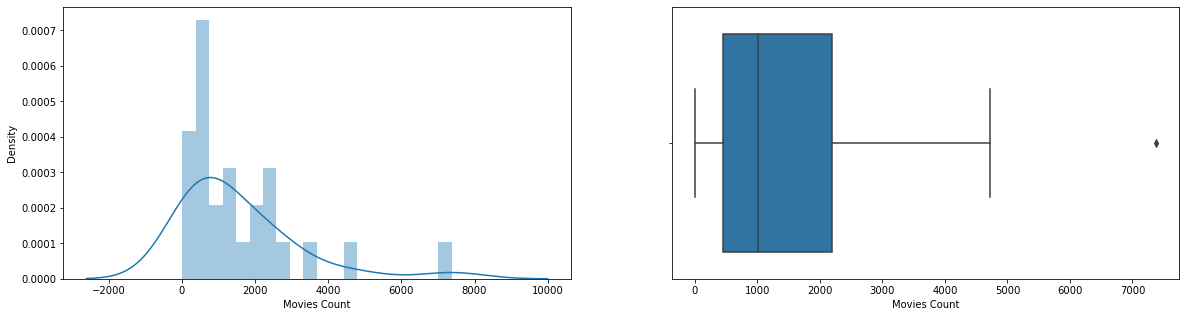

In [68]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(genre_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(genre_data_movies['Movies Count'], ax = ax[1])
plt.show()

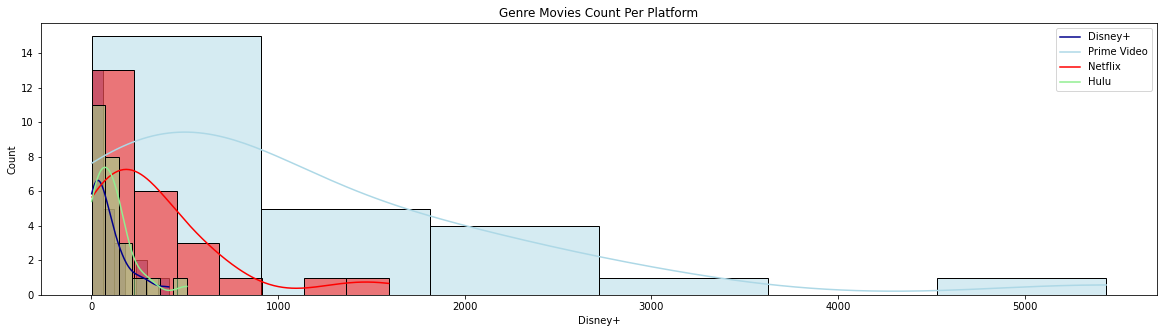

In [69]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Genre Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_genre_movies['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_genre_movies['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_genre_movies['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_genre_movies['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [70]:
print(f'''
      The Genre with Highest Movies Count Ever Got is '{df_genre_high_movies['Genre'][0]}' : '{df_genre_high_movies['Movies Count'].max()}'\n
      The Genre with Lowest Movies Count Ever Got is '{df_genre_low_movies['Genre'][0]}' : '{df_genre_low_movies['Movies Count'].min()}'\n
      
      The Genre with Highest Movies Count on 'Netflix' is '{netflix_genre_high_movies['Genre'][0]}' : '{netflix_genre_high_movies['Netflix'].max()}'\n
      The Genre with Lowest Movies Count on 'Netflix' is '{netflix_genre_low_movies['Genre'][0]}' : '{netflix_genre_low_movies['Netflix'].min()}'\n
      
      The Genre with Highest Movies Count on 'Hulu' is '{hulu_genre_high_movies['Genre'][0]}' : '{hulu_genre_high_movies['Hulu'].max()}'\n
      The Genre with Lowest Movies Count on 'Hulu' is '{hulu_genre_low_movies['Genre'][0]}' : '{hulu_genre_low_movies['Hulu'].min()}'\n
      
      The Genre with Highest Movies Count on 'Prime Video' is '{prime_video_genre_high_movies['Genre'][0]}' : '{prime_video_genre_high_movies['Prime Video'].max()}'\n
      The Genre with Lowest Movies Count on 'Prime Video' is '{prime_video_genre_low_movies['Genre'][0]}' : '{prime_video_genre_low_movies['Prime Video'].min()}'\n
      
      The Genre with Highest Movies Count on 'Disney+' is '{disney_genre_high_movies['Genre'][0]}' : '{disney_genre_high_movies['Disney+'].max()}'\n
      The Genre with Lowest Movies Count on 'Disney+' is '{disney_genre_low_movies['Genre'][0]}' : '{disney_genre_low_movies['Disney+'].min()}'\n 
      ''')


      The Genre with Highest Movies Count Ever Got is 'Drama' : '7381'

      The Genre with Lowest Movies Count Ever Got is 'Talk-Show' : '2'

      
      The Genre with Highest Movies Count on 'Netflix' is 'Drama' : '1592'

      The Genre with Lowest Movies Count on 'Netflix' is 'Talk-Show' : '0'

      
      The Genre with Highest Movies Count on 'Hulu' is 'Drama' : '511'

      The Genre with Lowest Movies Count on 'Hulu' is 'Talk-Show' : '0'

      
      The Genre with Highest Movies Count on 'Prime Video' is 'Drama' : '5436'

      The Genre with Lowest Movies Count on 'Prime Video' is 'Talk-Show' : '2'

      
      The Genre with Highest Movies Count on 'Disney+' is 'Family' : '414'

      The Genre with Lowest Movies Count on 'Disney+' is 'Talk-Show' : '0'
 
      


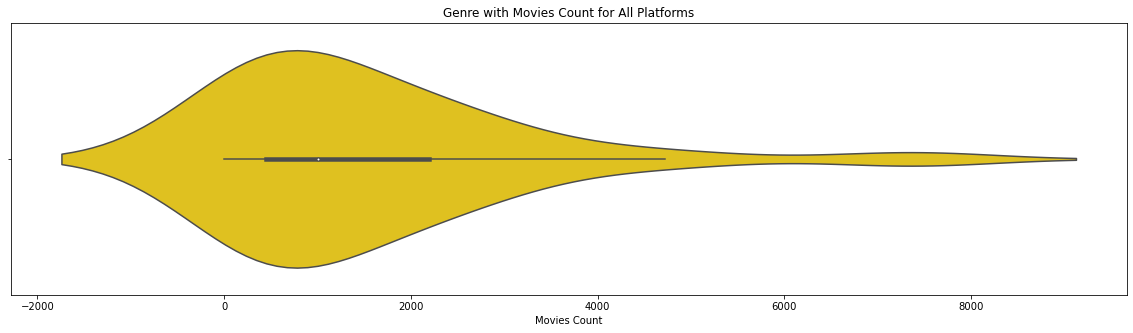

In [71]:
# Distribution of movies genre in each platform
plt.figure(figsize = (20, 5))
plt.title('Genre with Movies Count for All Platforms')
sns.violinplot(x = genre_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

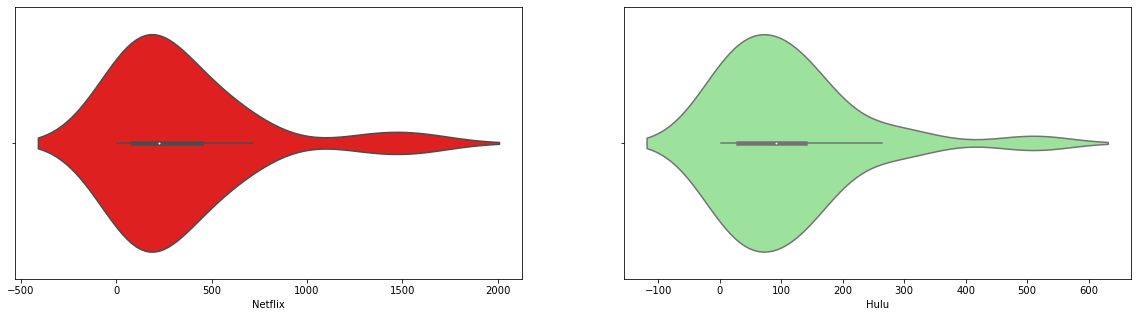

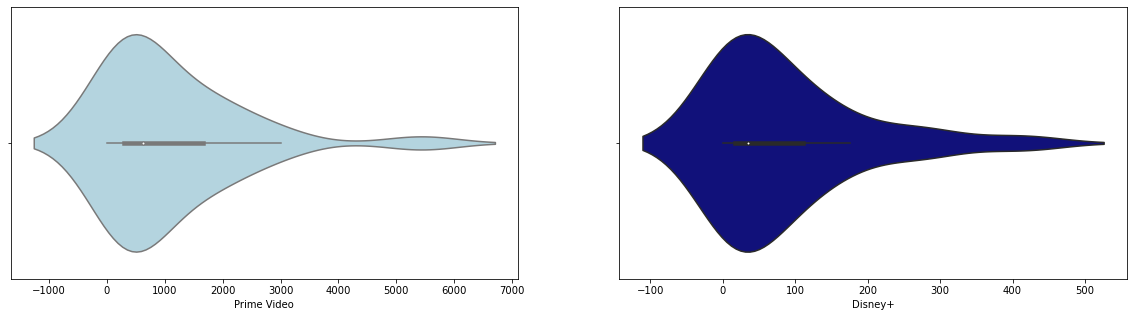

In [72]:
# Distribution of Genre Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_genre_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_genre_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_genre_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_genre_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [73]:
print(f'''
      Accross All Platforms the Average Movies Count of Genre is '{round(genre_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genre on 'Netflix' is '{round(netflix_genre_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genre on 'Hulu' is '{round(hulu_genre_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genre on 'Prime Video' is '{round(prime_video_genre_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genre on 'Disney+' is '{round(disney_genre_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Genre is '1545.54'

      The Average Movies Count of Genre on 'Netflix' is '347.2'

      The Average Movies Count of Genre on 'Hulu' is '111.16'

      The Average Movies Count of Genre on 'Prime Video' is '1089.58'

      The Average Movies Count of Genre on 'Disney+' is '87.12'
 
      


In [74]:
print(f'''
      Accross All Platforms Total Count of Genre is '{genre_data_movies['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Netflix' is '{netflix_genre_movies['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Hulu' is '{hulu_genre_movies['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Prime Video' is '{prime_video_genre_movies['Genre'].unique().shape[0]}'\n
      Total Count of Genre on 'Disney+' is '{disney_genre_movies['Genre'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Genre is '26'

      Total Count of Genre on 'Netflix' is '25'

      Total Count of Genre on 'Hulu' is '25'

      Total Count of Genre on 'Prime Video' is '26'

      Total Count of Genre on 'Disney+' is '24'
 
      


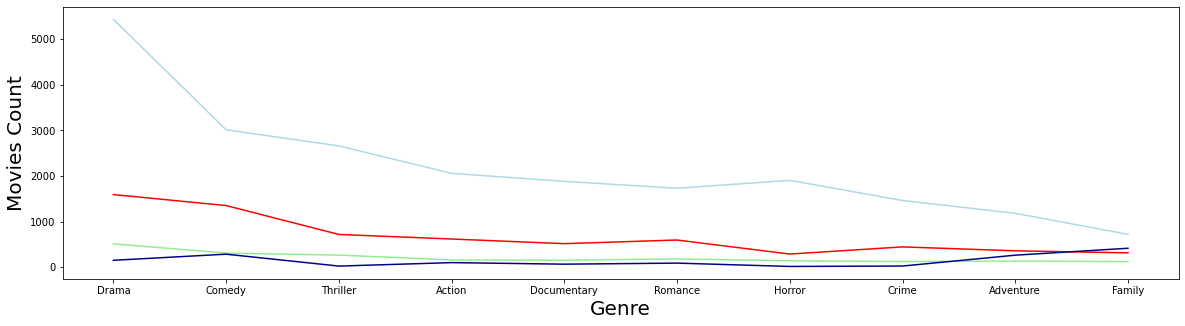

In [75]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = genre_data_movies['Genre'][:10], y = genre_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = genre_data_movies['Genre'][:10], y = genre_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = genre_data_movies['Genre'][:10], y = genre_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = genre_data_movies['Genre'][:10], y = genre_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Movies Count', fontsize = 20)
plt.show()

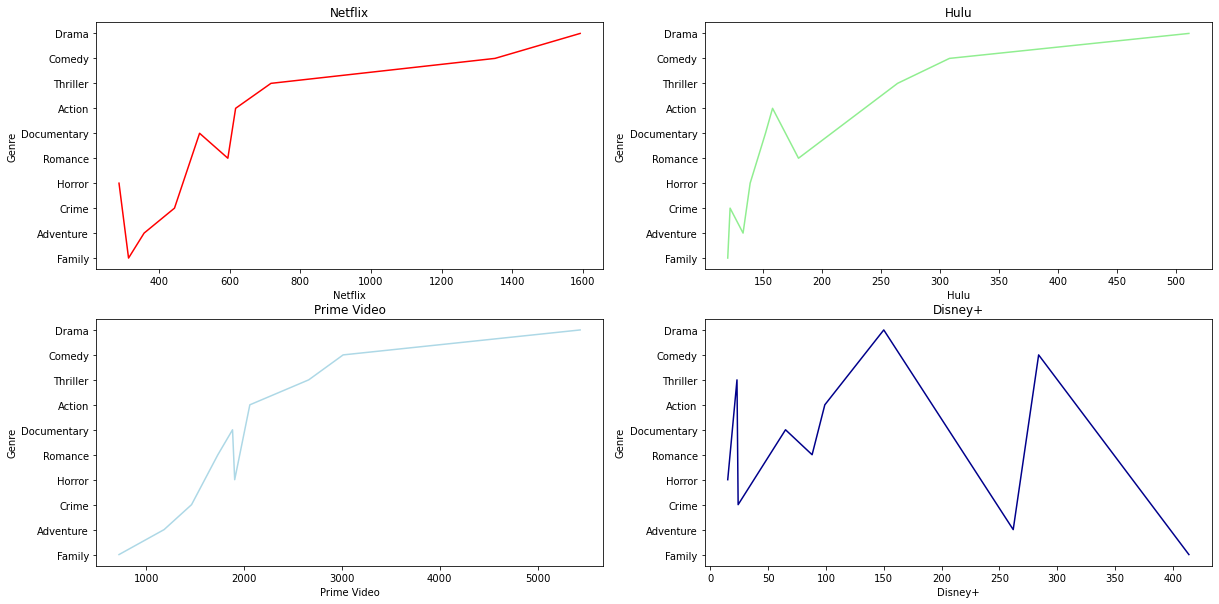

In [76]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_g_ax1 = sns.lineplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_g_ax2 = sns.lineplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_g_ax3 = sns.lineplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_g_ax4 = sns.lineplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

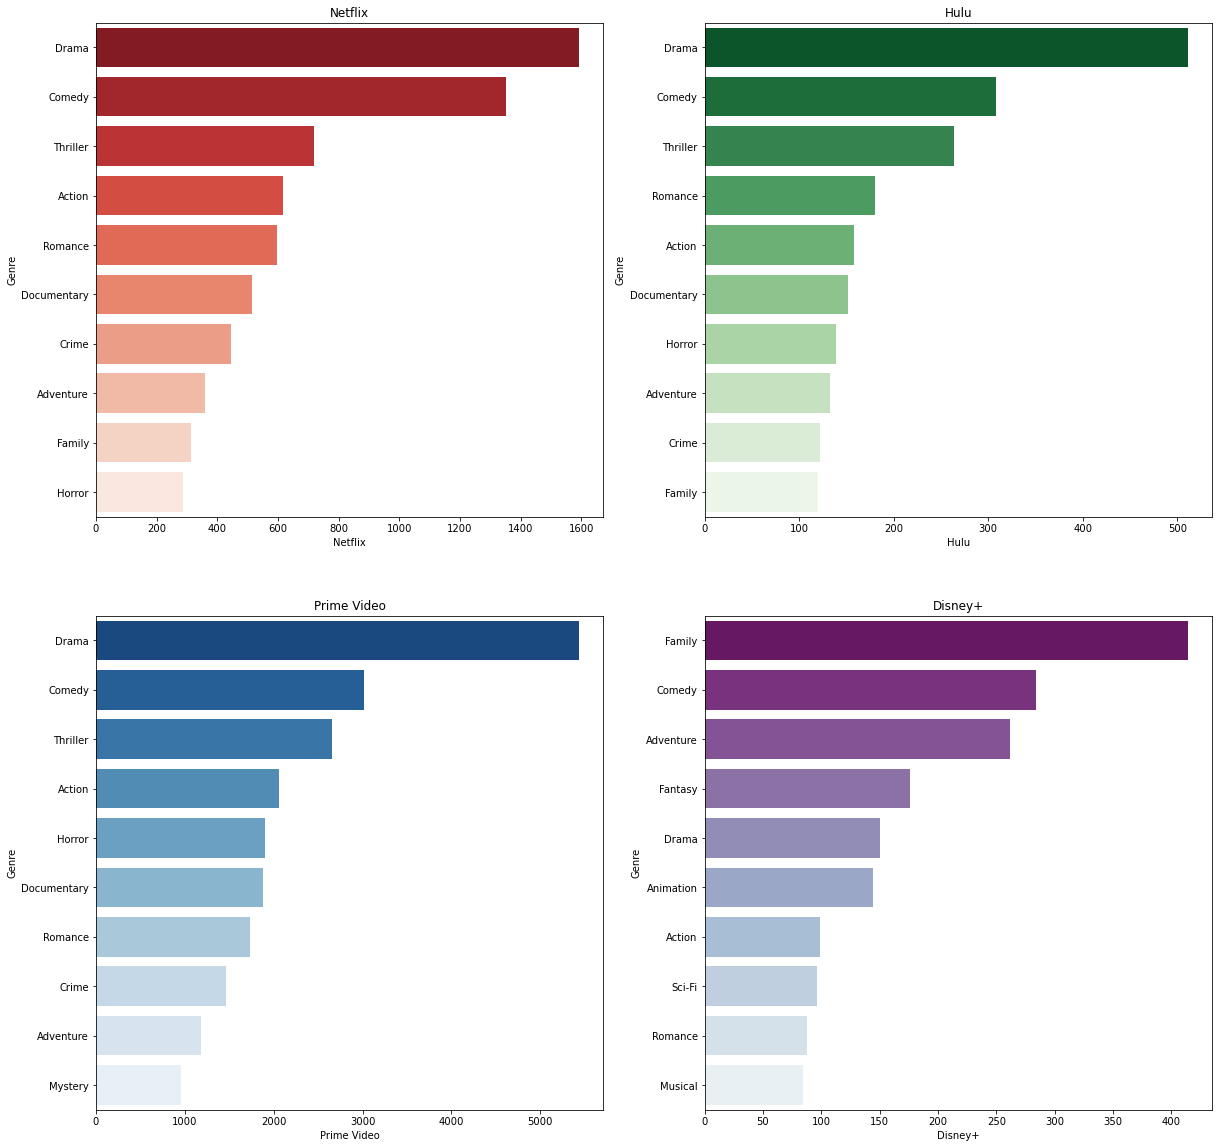

In [77]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_g_ax1 = sns.barplot(y = netflix_genre_movies['Genre'][:10], x = netflix_genre_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_g_ax2 = sns.barplot(y = hulu_genre_movies['Genre'][:10], x = hulu_genre_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_g_ax3 = sns.barplot(y = prime_video_genre_movies['Genre'][:10], x = prime_video_genre_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_g_ax4 = sns.barplot(y = disney_genre_movies['Genre'][:10], x = disney_genre_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

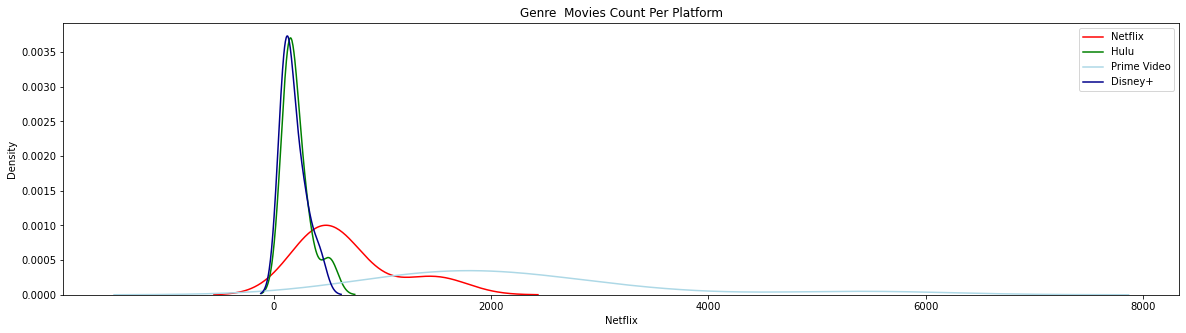

In [78]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Genre  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_genre_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_genre_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_genre_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_genre_movies['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

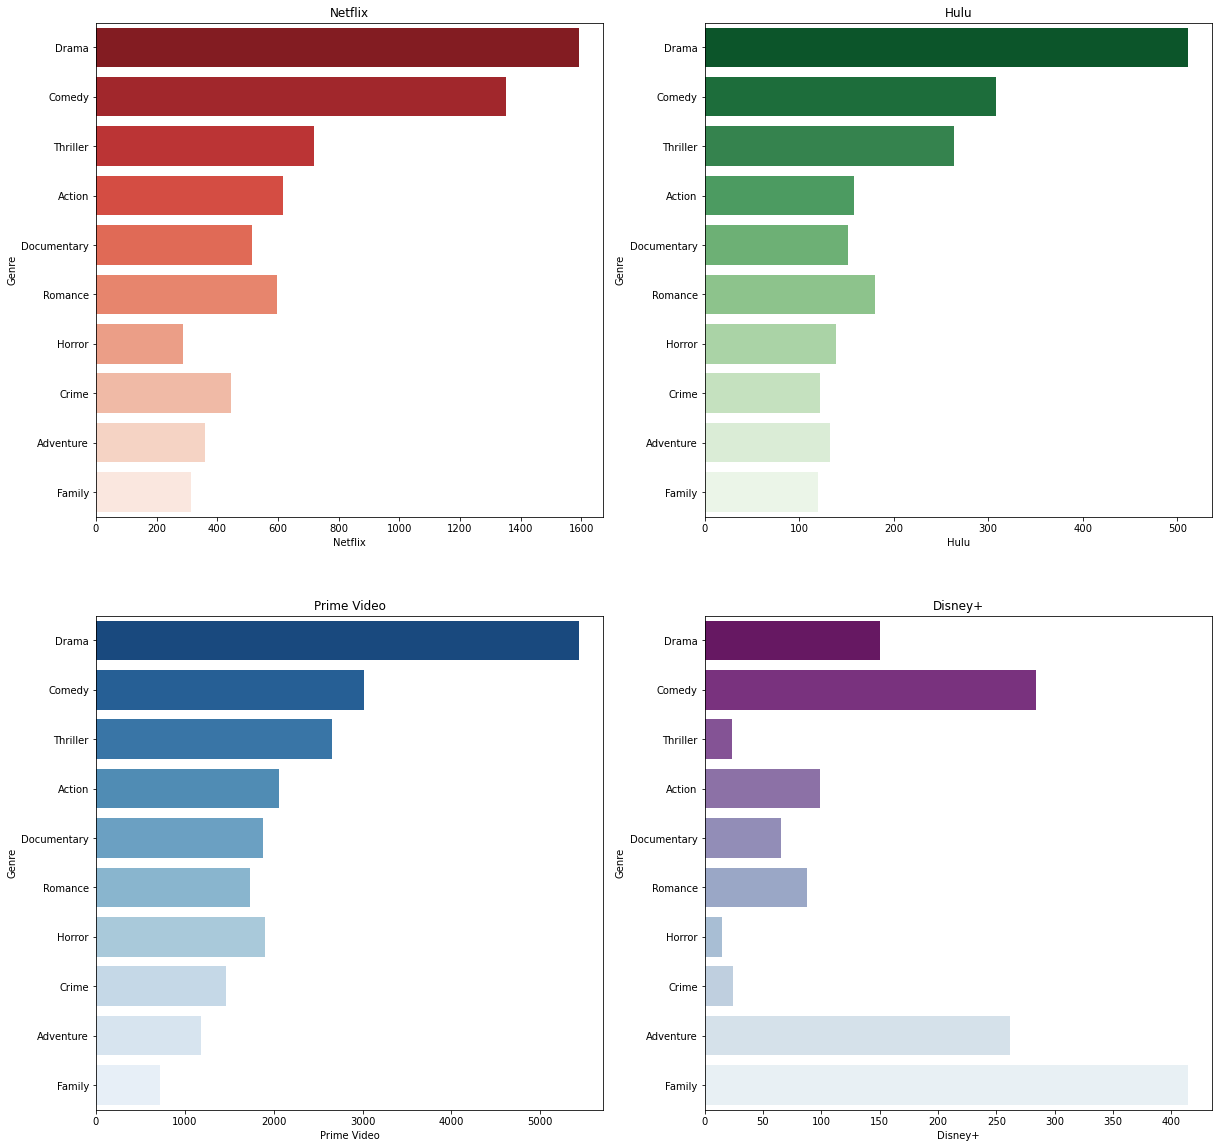

In [79]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_g_ax1 = sns.barplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_g_ax2 = sns.barplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_g_ax3 = sns.barplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_g_ax4 = sns.barplot(y = genre_data_movies['Genre'][:10], x = genre_data_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

In [80]:
df_movies_mixed_genres.drop(df_movies_mixed_genres.loc[df_movies_mixed_genres['Genres'] == "NA"].index, inplace = True)
# df_movies_mixed_genres = df_movies_mixed_genres[df_movies_mixed_genres.Genre != "NA"]
df_movies_mixed_genres.drop(df_movies_mixed_genres.loc[df_movies_mixed_genres['Number of Genres'] == 1].index, inplace = True)

In [81]:
df_movies_mixed_genres.head(5)

ID                              Title  Year Age IMDb Rotten Tomatoes  \
0   1                          Inception  2010  13  8.8              87   
1   2                         The Matrix  1999  16  8.7              88   
2   3             Avengers: Infinity War  2018  13  8.4              85   
3   4                 Back to the Future  1985   7  8.5              96   
5   6  Spider-Man: Into the Spider-Verse  2018   7  8.4              97   

                                     Directors  \
0                            Christopher Nolan   
1               Lana Wachowski,Lilly Wachowski   
2                      Anthony Russo,Joe Russo   
3                              Robert Zemeckis   
5  Bob Persichetti,Peter Ramsey,Rodney Rothman   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
5  Shameik Moore,Jake Johnson,Hailee Steinfeld,Ma...   

                                     Genres                       Country  \
0          Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                             Action,Sci-Fi                 United States   
2                   Action,Adventure,Sci-Fi                 United States   
3                   Adventure,Comedy,Sci-Fi                 United States   
5  Animation,Action,Adventure,Family,Sci-Fi                 United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  Dom Cobb is a skilled thief, the absolute best...     148  movie   
1  ...  Thomas A. Anderson is a man living two lives. ...     136  movie   
2  ...  As the Avengers and their allies have continue...     149  movie   
3  ...  Marty McFly, a typical American teenager of th...     116  movie   
5  ...  Phil Lord and Christopher Miller, the creative...     117  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       1     0            0        0     0           Netflix                4  
1       1     0            0        0     0           Netflix                2  
2       1     0            0        0     0           Netflix                3  
3       1     0            0        0     0           Netflix                3  
5       1     0            0        0     0           Netflix                5  

[5 rows x 21 columns]

In [82]:
mixed_genres_count = df_movies_mixed_genres.groupby('Genres')['Title'].count()
mixed_genres_movies = df_movies_mixed_genres.groupby('Genres')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_genres_data_movies = pd.concat([mixed_genres_count, mixed_genres_movies], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count', 'Genres' : 'Mixed Genre'})
mixed_genres_data_movies = mixed_genres_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [83]:
mixed_genres_data_movies.head(5)

Mixed Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
1004          Comedy,Drama           460      128    42          315        0
1641         Drama,Romance           418       96    37          299        1
1062  Comedy,Drama,Romance           353      110    38          219        0
1160        Comedy,Romance           298       98    23          194        1
1740       Horror,Thriller           290       38    19          243        0

In [84]:
# Mixed Genre with Movies Counts - All Platforms Combined
mixed_genres_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Mixed Genre  Movies Count  Netflix  Hulu  Prime Video  \
1004             Comedy,Drama           460      128    42          315   
1641            Drama,Romance           418       96    37          299   
1062     Comedy,Drama,Romance           353      110    38          219   
1160           Comedy,Romance           298       98    23          194   
1740          Horror,Thriller           290       38    19          243   
1661           Drama,Thriller           229       38    23          179   
1229     Crime,Drama,Thriller           176       45    11          129   
317              Action,Drama           166       27     0          146   
1177              Crime,Drama           159       26     8          129   
1732  Horror,Mystery,Thriller           158       32    11          123   

      Disney+  
1004        0  
1641        1  
1062        0  
1160        1  
1740        0  
1661        0  
1229        1  
317         0  
1177        0  
1732        1

In [85]:
df_mixed_genres_high_movies = mixed_genres_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_mixed_genres_high_movies = df_mixed_genres_high_movies.drop(['index'], axis = 1)
# filter = (mixed_genres_data_movies['Movies Count'] = =  (mixed_genres_data_movies['Movies Count'].max()))
# df_mixed_genres_high_movies = mixed_genres_data_movies[filter]
 
# highest_rated_movies = mixed_genres_data_movies.loc[mixed_genres_data_movies['Movies Count'].idxmax()]
 
print('\nMixed Genre with Highest Ever Movies Count are : All Platforms Combined\n')
df_mixed_genres_high_movies.head(5)


Mixed Genre with Highest Ever Movies Count are : All Platforms Combined



Mixed Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0          Comedy,Drama           460      128    42          315        0
1         Drama,Romance           418       96    37          299        1
2  Comedy,Drama,Romance           353      110    38          219        0
3        Comedy,Romance           298       98    23          194        1
4       Horror,Thriller           290       38    19          243        0

In [86]:
fig = px.bar(y = df_mixed_genres_high_movies['Mixed Genre'][:15],
             x = df_mixed_genres_high_movies['Movies Count'][:15], 
             color = df_mixed_genres_high_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Mixed Genre'},
             title  = 'Movies with Highest Number of Mixed Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [87]:
df_mixed_genres_low_movies = mixed_genres_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_mixed_genres_low_movies = df_mixed_genres_low_movies.drop(['index'], axis = 1)
# filter = (mixed_genres_data_movies['Movies Count'] = =  (mixed_genres_data_movies['Movies Count'].min()))
# df_mixed_genres_low_movies = mixed_genres_data_movies[filter]
 
print('\nMixed Genre with Lowest Ever Movies Count are : All Platforms Combined\n')
df_mixed_genres_low_movies.head(5)


Mixed Genre with Lowest Ever Movies Count are : All Platforms Combined



Mixed Genre  Movies Count  Netflix  \
0         Action,Adventure,Crime,Film-Noir,Romance             1        1   
1                              Drama,Musical,Sport             1        1   
2                           Drama,Musical,Thriller             1        0   
3  Action,Adventure,Comedy,Fantasy,Sci-Fi,Thriller             1        0   
4          Action,Adventure,Comedy,Fantasy,Western             1        0   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            0        0  
2     0            1        0  
3     0            1        0  
4     0            1        0

In [88]:
fig = px.bar(y = df_mixed_genres_low_movies['Mixed Genre'][:15],
             x = df_mixed_genres_low_movies['Movies Count'][:15], 
             color = df_mixed_genres_low_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Mixed Genre'},
             title  = 'Movies with Lowest Number of Mixed Genres : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [89]:
print(f'''
      Total '{df_movies_genres['Genres'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{mixed_genres_data_movies['Mixed Genre'].unique().shape[0]}' Mixed Genre, They were Like this, \n
 
      {mixed_genres_data_movies.sort_values(by = 'Movies Count', ascending = False)['Mixed Genre'].head(5).unique()} etc. \n
 
      The Mixed Genre with Highest Movies Count have '{mixed_genres_data_movies['Movies Count'].max()}' Movies Available is '{df_mixed_genres_high_movies['Mixed Genre'][0]}', &\n
      The Mixed Genre with Lowest Movies Count have '{mixed_genres_data_movies['Movies Count'].min()}' Movies Available is '{df_mixed_genres_low_movies['Mixed Genre'][0]}'
      ''')


      Total '16689' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '1864' Mixed Genre, They were Like this, 

 
      ['Comedy,Drama' 'Drama,Romance' 'Comedy,Drama,Romance' 'Comedy,Romance'
 'Horror,Thriller'] etc. 

 
      The Mixed Genre with Highest Movies Count have '460' Movies Available is 'Comedy,Drama', &

      The Mixed Genre with Lowest Movies Count have '1' Movies Available is 'Action,Adventure,Crime,Film-Noir,Romance'
      


In [90]:
fig = px.pie(mixed_genres_data_movies[:10], names = 'Mixed Genre', values = 'Movies Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'Movies Count based on Mixed Genre')
fig.show()

In [91]:
# netflix_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_genres_movies = netflix_mixed_genres_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_mixed_genres_high_movies = df_mixed_genres_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_genres_high_movies = netflix_mixed_genres_high_movies.drop(['index'], axis = 1)
 
netflix_mixed_genres_low_movies = df_mixed_genres_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_genres_low_movies = netflix_mixed_genres_low_movies.drop(['index'], axis = 1)
 
netflix_mixed_genres_high_movies.head(5)

Mixed Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0          Comedy,Drama           460      128    42          315        0
1  Comedy,Drama,Romance           353      110    38          219        0
2        Comedy,Romance           298       98    23          194        1
3         Drama,Romance           418       96    37          299        1
4    Documentary,Comedy           142       56     2           94        0

In [92]:
# hulu_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_genres_movies = hulu_mixed_genres_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_mixed_genres_high_movies = df_mixed_genres_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_genres_high_movies = hulu_mixed_genres_high_movies.drop(['index'], axis = 1)
 
hulu_mixed_genres_low_movies = df_mixed_genres_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_genres_low_movies = hulu_mixed_genres_low_movies.drop(['index'], axis = 1)
 
hulu_mixed_genres_high_movies.head(5)

Mixed Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0          Comedy,Drama           460      128    42          315        0
1  Comedy,Drama,Romance           353      110    38          219        0
2         Drama,Romance           418       96    37          299        1
3        Comedy,Romance           298       98    23          194        1
4        Drama,Thriller           229       38    23          179        0

In [93]:
# prime_video_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_genres_movies = prime_video_mixed_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_mixed_genres_high_movies = df_mixed_genres_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_genres_high_movies = prime_video_mixed_genres_high_movies.drop(['index'], axis = 1)
 
prime_video_mixed_genres_low_movies = df_mixed_genres_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_genres_low_movies = prime_video_mixed_genres_low_movies.drop(['index'], axis = 1)
 
prime_video_mixed_genres_high_movies.head(5)

Mixed Genre  Movies Count  Netflix  Hulu  Prime Video  Disney+
0          Comedy,Drama           460      128    42          315        0
1         Drama,Romance           418       96    37          299        1
2       Horror,Thriller           290       38    19          243        0
3  Comedy,Drama,Romance           353      110    38          219        0
4        Comedy,Romance           298       98    23          194        1

In [94]:
# disney_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_genres_movies = disney_mixed_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_mixed_genres_high_movies = df_mixed_genres_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_genres_high_movies = disney_mixed_genres_high_movies.drop(['index'], axis = 1)
 
disney_mixed_genres_low_movies = df_mixed_genres_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_genres_low_movies = disney_mixed_genres_low_movies.drop(['index'], axis = 1)
 
disney_mixed_genres_high_movies.head(5)

Mixed Genre  Movies Count  Netflix  Hulu  \
0                    Action,Adventure,Sci-Fi            60       12     6   
1  Animation,Adventure,Comedy,Family,Fantasy            49       13     9   
2                              Comedy,Family            69       19    11   
3                           Adventure,Family            23        2     1   
4                        Comedy,Drama,Family            48        7     1   

   Prime Video  Disney+  
0           33       19  
1           15       17  
2           28       12  
3           10       11  
4           30       11

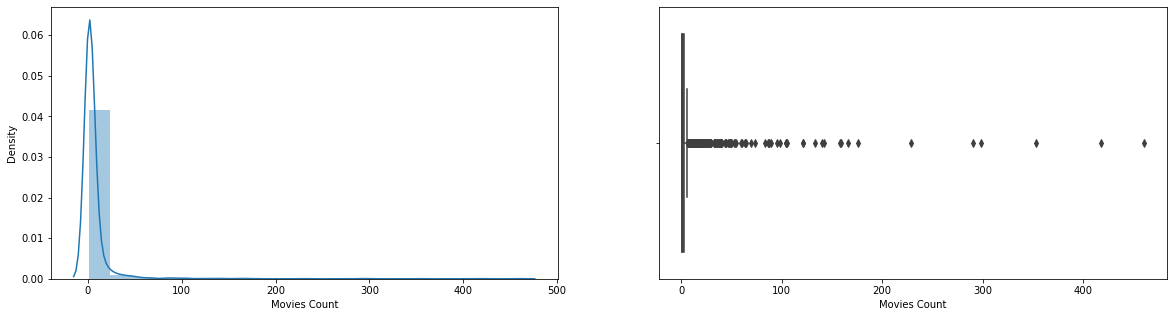

In [95]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_genres_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_genres_data_movies['Movies Count'], ax = ax[1])
plt.show()

In [96]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_genres_movies = netflix_mixed_genres_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_genres_movies = hulu_mixed_genres_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_genres_movies = prime_video_mixed_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_mixed_genres_movies = mixed_genres_data_movies[mixed_genres_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_genres_movies = disney_mixed_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

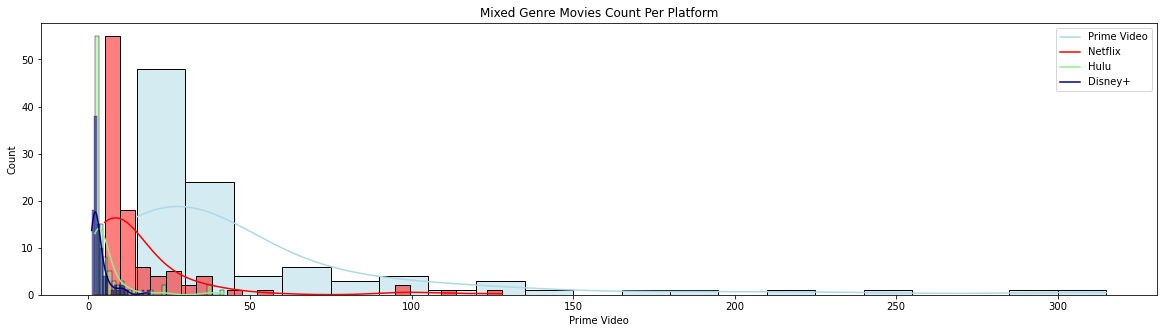

In [97]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Genre Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_genres_movies['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_genres_movies['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_genres_movies['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_genres_movies['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [98]:
print(f'''
      The Mixed Genre with Highest Movies Count Ever Got is '{df_mixed_genres_high_movies['Mixed Genre'][0]}' : '{df_mixed_genres_high_movies['Movies Count'].max()}'\n
      The Mixed Genre with Lowest Movies Count Ever Got is '{df_mixed_genres_low_movies['Mixed Genre'][0]}' : '{df_mixed_genres_low_movies['Movies Count'].min()}'\n
      
      The Mixed Genre with Highest Movies Count on 'Netflix' is '{netflix_mixed_genres_high_movies['Mixed Genre'][0]}' : '{netflix_mixed_genres_high_movies['Netflix'].max()}'\n
      The Mixed Genre with Lowest Movies Count on 'Netflix' is '{netflix_mixed_genres_low_movies['Mixed Genre'][0]}' : '{netflix_mixed_genres_low_movies['Netflix'].min()}'\n
      
      The Mixed Genre with Highest Movies Count on 'Hulu' is '{hulu_mixed_genres_high_movies['Mixed Genre'][0]}' : '{hulu_mixed_genres_high_movies['Hulu'].max()}'\n
      The Mixed Genre with Lowest Movies Count on 'Hulu' is '{hulu_mixed_genres_low_movies['Mixed Genre'][0]}' : '{hulu_mixed_genres_low_movies['Hulu'].min()}'\n
      
      The Mixed Genre with Highest Movies Count on 'Prime Video' is '{prime_video_mixed_genres_high_movies['Mixed Genre'][0]}' : '{prime_video_mixed_genres_high_movies['Prime Video'].max()}'\n
      The Mixed Genre with Lowest Movies Count on 'Prime Video' is '{prime_video_mixed_genres_low_movies['Mixed Genre'][0]}' : '{prime_video_mixed_genres_low_movies['Prime Video'].min()}'\n
      
      The Mixed Genre with Highest Movies Count on 'Disney+' is '{disney_mixed_genres_high_movies['Mixed Genre'][0]}' : '{disney_mixed_genres_high_movies['Disney+'].max()}'\n
      The Mixed Genre with Lowest Movies Count on 'Disney+' is '{disney_mixed_genres_low_movies['Mixed Genre'][0]}' : '{disney_mixed_genres_low_movies['Disney+'].min()}'\n 
      ''')


      The Mixed Genre with Highest Movies Count Ever Got is 'Comedy,Drama' : '460'

      The Mixed Genre with Lowest Movies Count Ever Got is 'Action,Adventure,Crime,Film-Noir,Romance' : '1'

      
      The Mixed Genre with Highest Movies Count on 'Netflix' is 'Comedy,Drama' : '128'

      The Mixed Genre with Lowest Movies Count on 'Netflix' is 'Animation,Short,Drama,Western' : '0'

      
      The Mixed Genre with Highest Movies Count on 'Hulu' is 'Comedy,Drama' : '42'

      The Mixed Genre with Lowest Movies Count on 'Hulu' is 'Animation,Short,Drama,Western' : '0'

      
      The Mixed Genre with Highest Movies Count on 'Prime Video' is 'Comedy,Drama' : '315'

      The Mixed Genre with Lowest Movies Count on 'Prime Video' is 'Biography,Drama,Sport,Thriller' : '0'

      
      The Mixed Genre with Highest Movies Count on 'Disney+' is 'Action,Adventure,Sci-Fi' : '19'

      The Mixed Genre with Lowest Movies Count on 'Disney+' is 'Comedy,Drama' : '0'
 
      


In [99]:
print(f'''
      Accross All Platforms the Average Movies Count of Mixed Genre is '{round(mixed_genres_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Genre on 'Netflix' is '{round(netflix_mixed_genres_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Genre on 'Hulu' is '{round(hulu_mixed_genres_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Genre on 'Prime Video' is '{round(prime_video_mixed_genres_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Genre on 'Disney+' is '{round(disney_mixed_genres_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Mixed Genre is '6.36'

      The Average Movies Count of Mixed Genre on 'Netflix' is '3.7'

      The Average Movies Count of Mixed Genre on 'Hulu' is '2.39'

      The Average Movies Count of Mixed Genre on 'Prime Video' is '5.72'

      The Average Movies Count of Mixed Genre on 'Disney+' is '1.9'
 
      


In [100]:
print(f'''
      Accross All Platforms Total Count of Mixed Genre is '{mixed_genres_data_movies['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Netflix' is '{netflix_mixed_genres_movies['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Hulu' is '{hulu_mixed_genres_movies['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Prime Video' is '{prime_video_mixed_genres_movies['Mixed Genre'].unique().shape[0]}'\n
      Total Count of Mixed Genre on 'Disney+' is '{disney_mixed_genres_movies['Mixed Genre'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Genre is '1864'

      Total Count of Mixed Genre on 'Netflix' is '679'

      Total Count of Mixed Genre on 'Hulu' is '347'

      Total Count of Mixed Genre on 'Prime Video' is '1487'

      Total Count of Mixed Genre on 'Disney+' is '273'
 
      


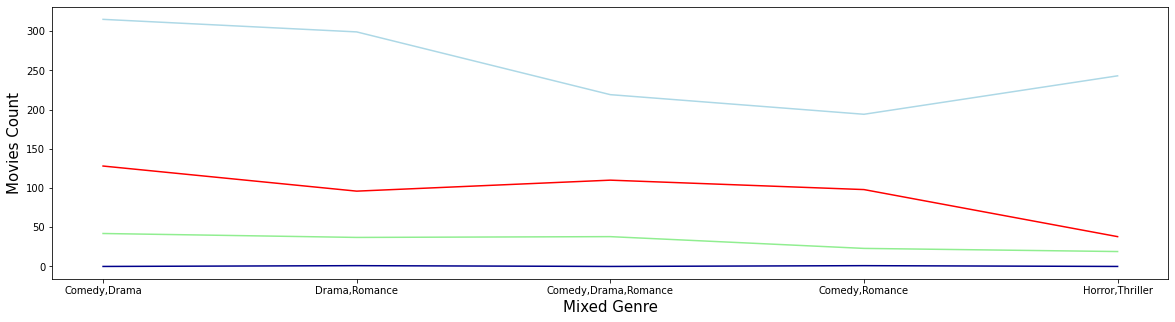

In [101]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_genres_data_movies['Mixed Genre'][:5], y = mixed_genres_data_movies['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_genres_data_movies['Mixed Genre'][:5], y = mixed_genres_data_movies['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_genres_data_movies['Mixed Genre'][:5], y = mixed_genres_data_movies['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_genres_data_movies['Mixed Genre'][:5], y = mixed_genres_data_movies['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Genre', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

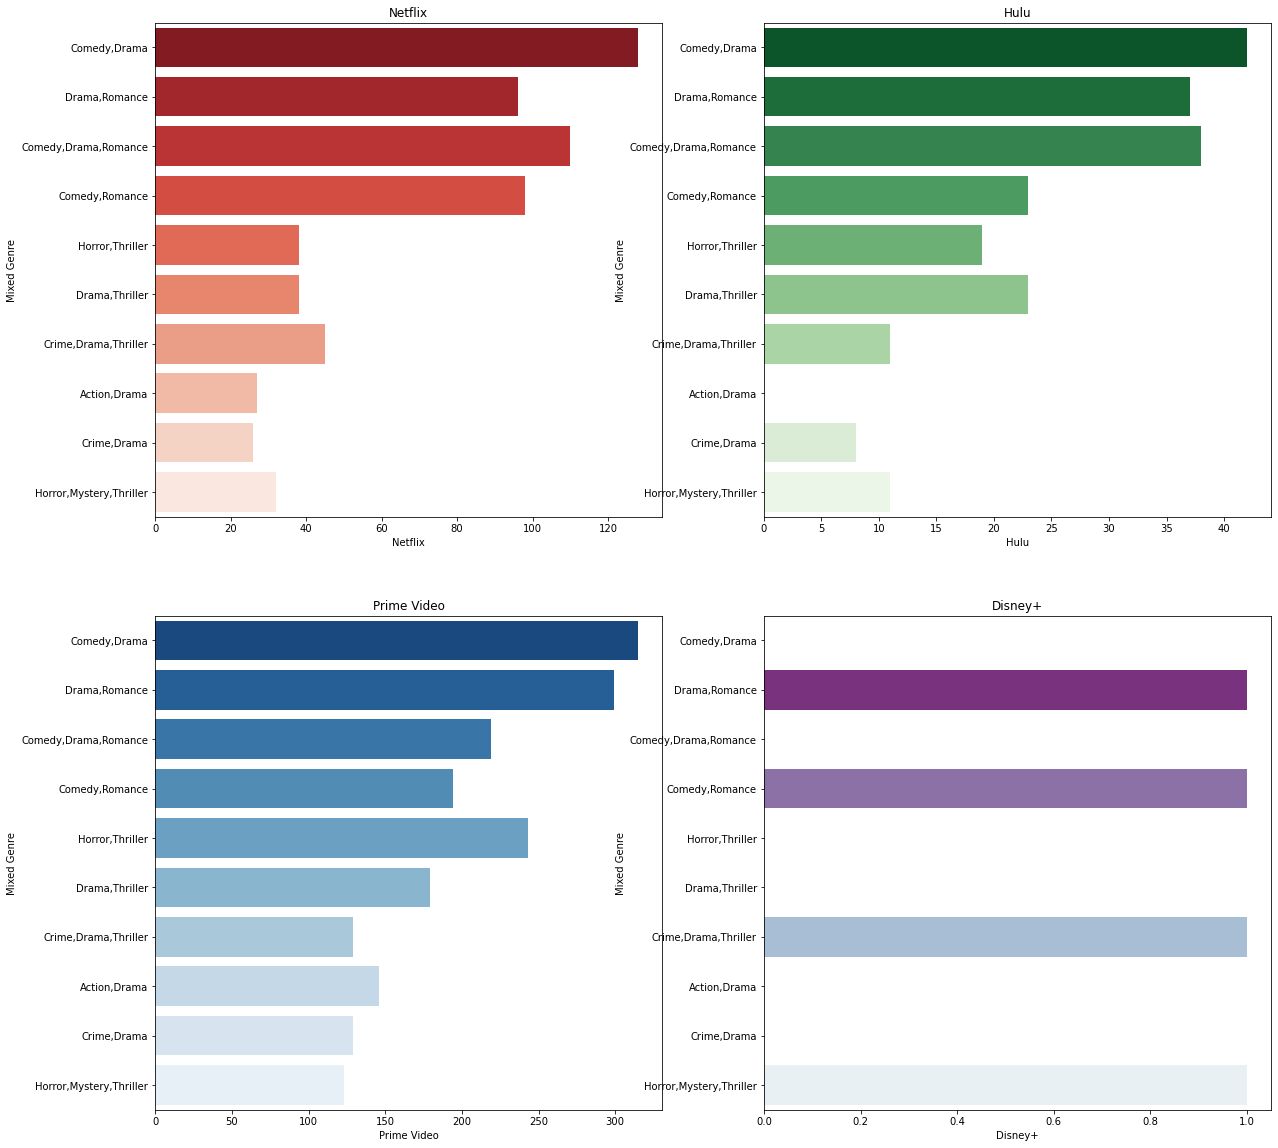

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_g_ax1 = sns.barplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_g_ax2 = sns.barplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_g_ax3 = sns.barplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_g_ax4 = sns.barplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_g_ax1.title.set_text(labels[0])
h_g_ax2.title.set_text(labels[1])
p_g_ax3.title.set_text(labels[2])
d_g_ax4.title.set_text(labels[3])
 
plt.show()

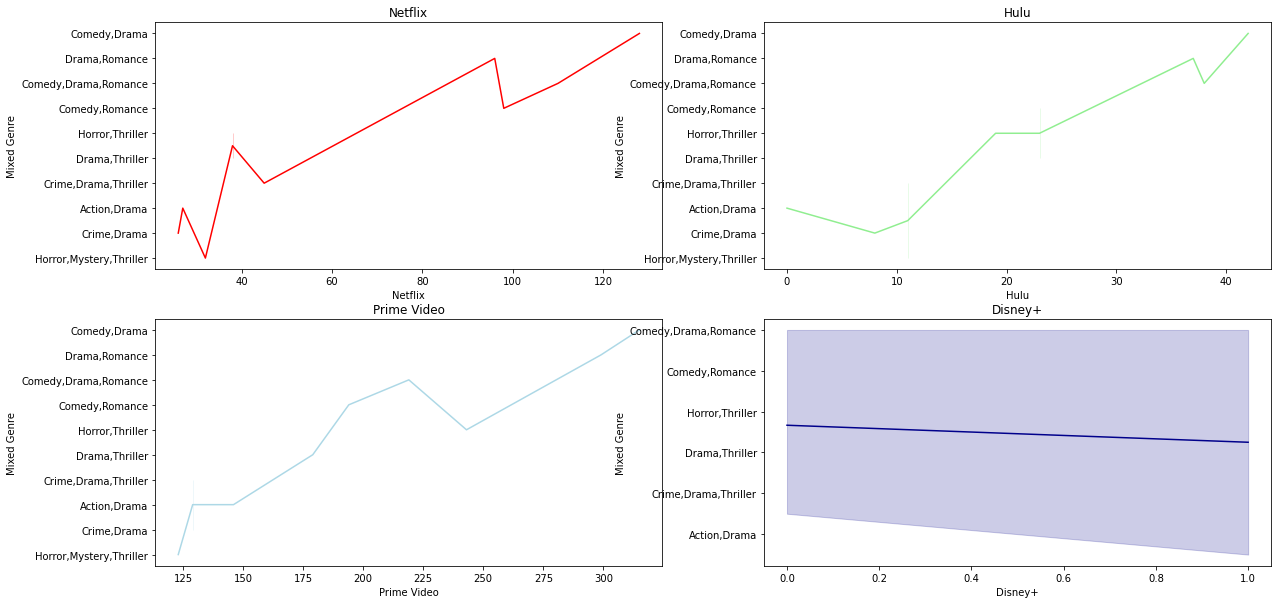

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_mg_ax1 = sns.lineplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_mg_ax2 = sns.lineplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_mg_ax3 = sns.lineplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_mg_ax4 = sns.lineplot(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mg_ax1.title.set_text(labels[0])
h_mg_ax2.title.set_text(labels[1])
p_mg_ax3.title.set_text(labels[2])
d_mg_ax4.title.set_text(labels[3])
 
plt.show()

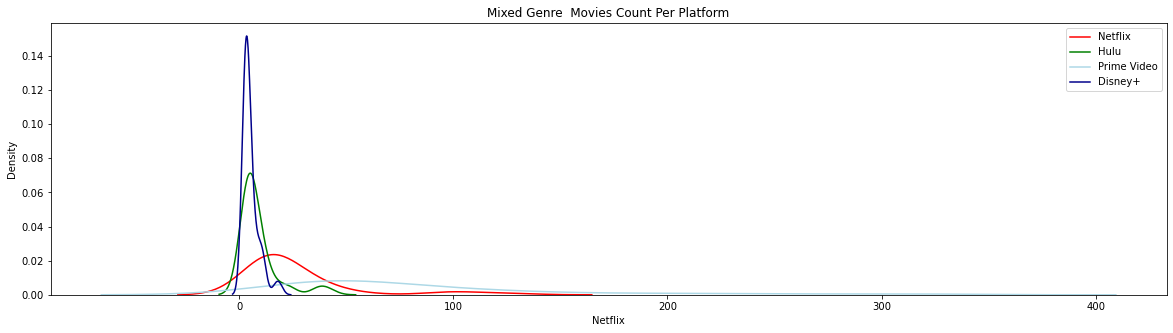

In [104]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Genre  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_genres_movies['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_genres_movies['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_genres_movies['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_genres_movies['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

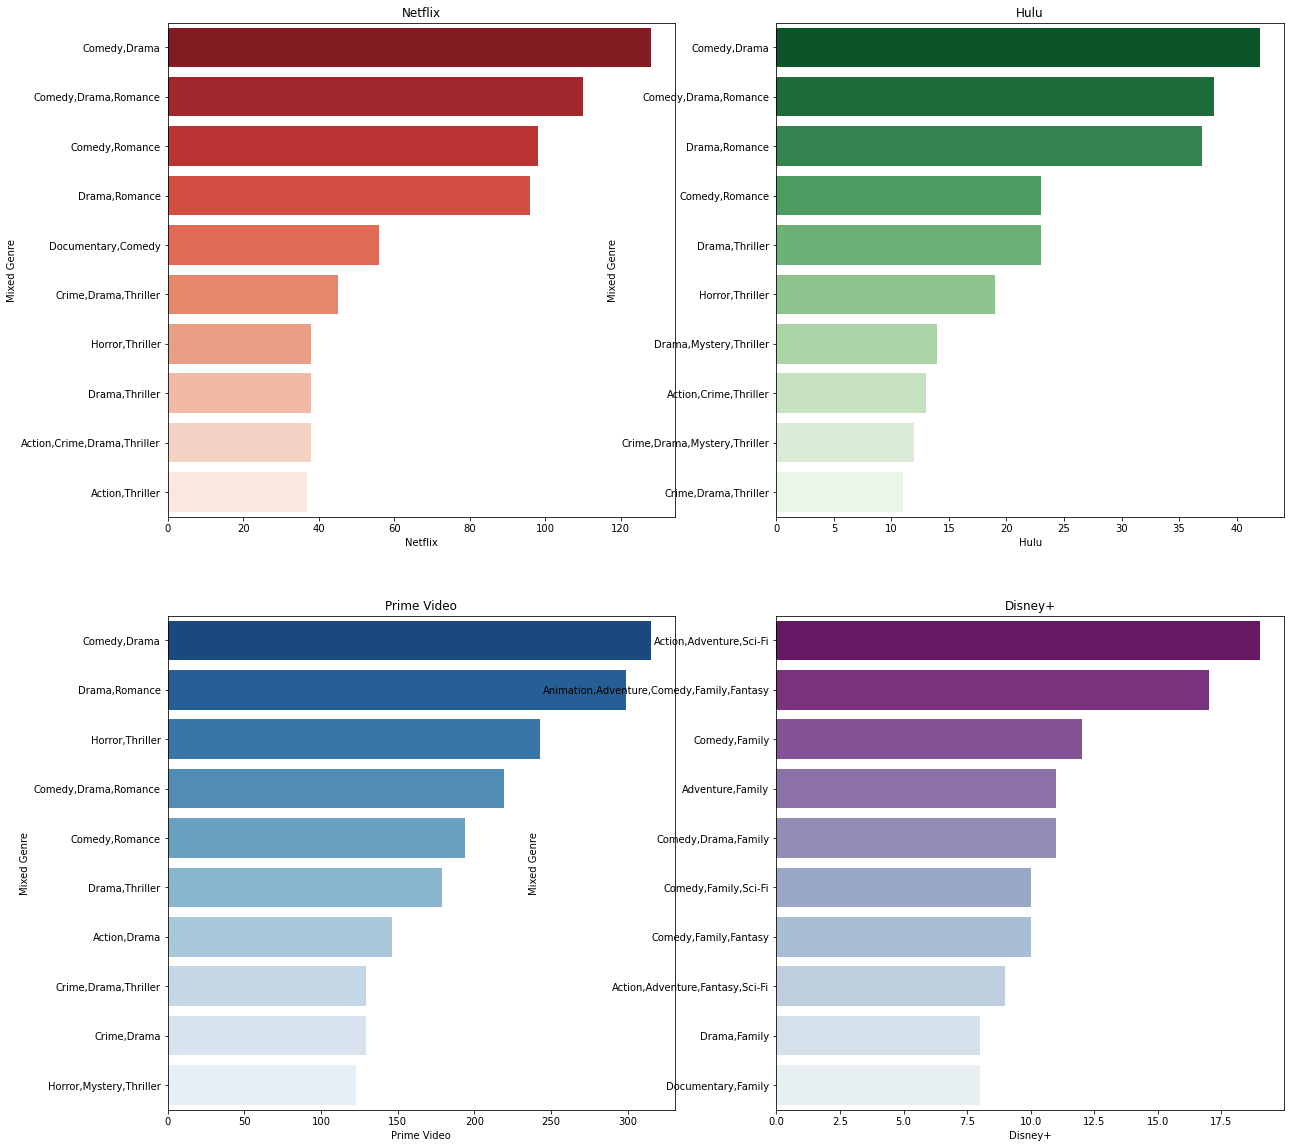

In [105]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_mg_ax1 = sns.barplot(y = netflix_mixed_genres_movies['Mixed Genre'][:10], x = netflix_mixed_genres_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_mg_ax2 = sns.barplot(y = hulu_mixed_genres_movies['Mixed Genre'][:10], x = hulu_mixed_genres_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_mg_ax3 = sns.barplot(y = prime_video_mixed_genres_movies['Mixed Genre'][:10], x = prime_video_mixed_genres_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_mg_ax4 = sns.barplot(y = disney_mixed_genres_movies['Mixed Genre'][:10], x = disney_mixed_genres_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mg_ax1.title.set_text(labels[0])
h_mg_ax2.title.set_text(labels[1])
p_mg_ax3.title.set_text(labels[2])
d_mg_ax4.title.set_text(labels[3])
 
plt.show()

In [106]:
fig = go.Figure(go.Funnel(y = mixed_genres_data_movies['Mixed Genre'][:10], x = mixed_genres_data_movies['Movies Count'][:10]))
fig.show()